### 2-D Norm Visualization

Now for the Frobenius norm in the 2-D scenario. <br></br>

The infinity norm is represented by the notation - 

$$||x||_{\infty}$$


We will use the same line equation from the $\ell_{1}$ and $\ell_{2}$ examples.

$$x_{2} = 2x_{1} + 3$$

In [334]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

from matplotlib import cm

In [335]:
x1 = np.arange(-10,11,.001)
line_fun = lambda x: (2 * x) + 3
x2 = line_fun(x1)

In [336]:
# Another interesting configuration to try if you are interested in the infinity norm.
# x1 = np.arange(-10,11,.001)
# line_fun = lambda x: (x-x) + 2
# x2 = line_fun(x1)

<IPython.core.display.Javascript object>


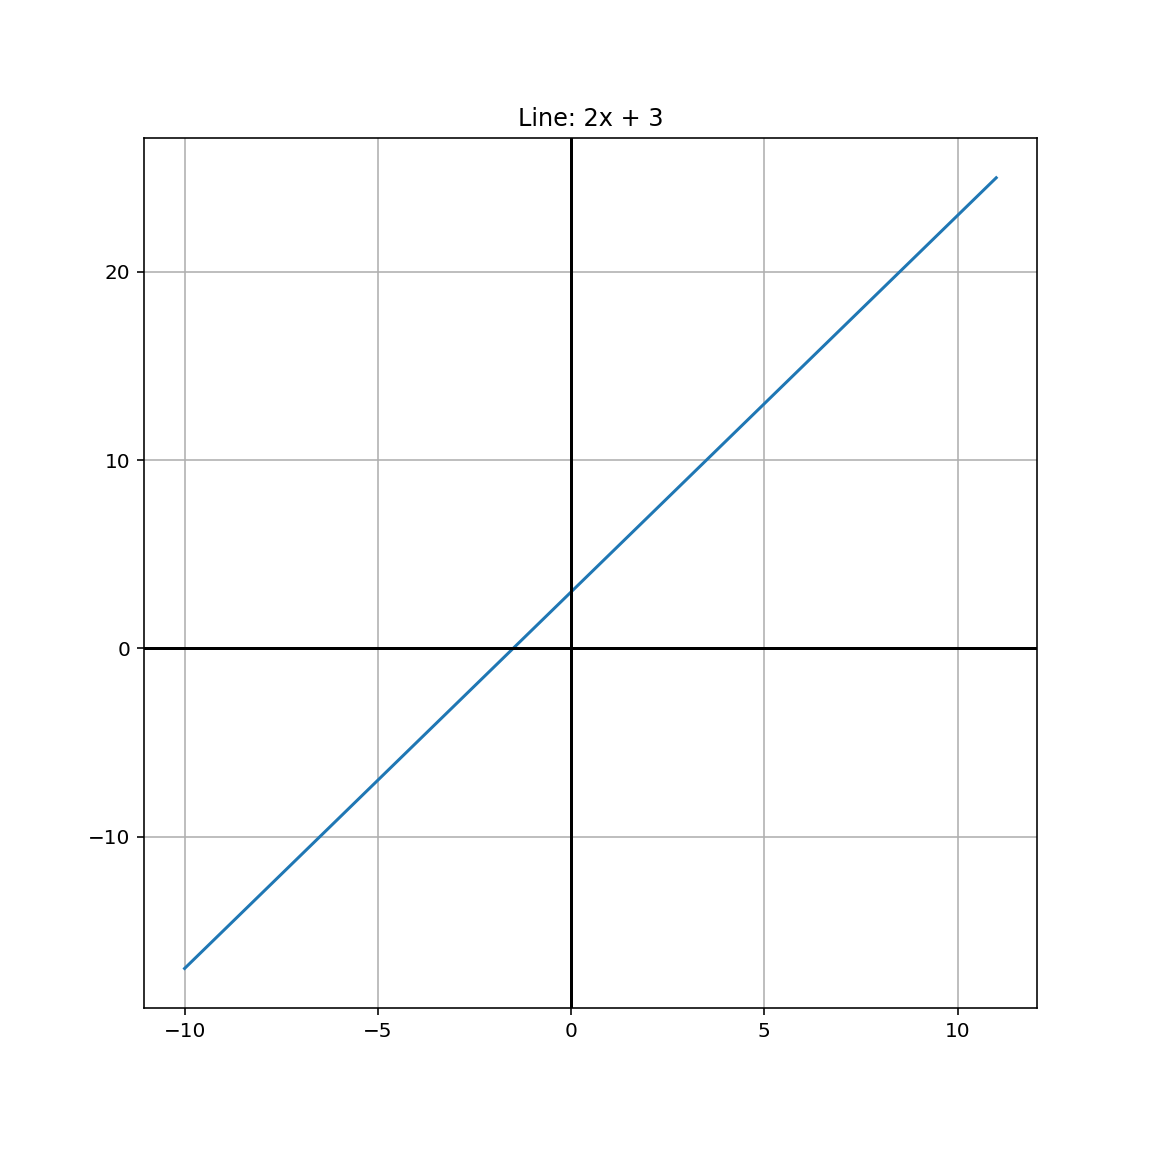

In [337]:
plt.figure(figsize=(8,8))
plt.title('Line: 2x + 3')
plt.plot(x1,x2)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show();

$$ \ell_{\infty} norm: ||x||_{\infty} = \max_{i}|x_{i}|$$

In [338]:
infty_norm = np.max(np.vstack((np.abs(x1), np.abs(x2))),axis=0)

In [339]:
np.min(infty_norm)

1.000000000004988

In [340]:
idxmin = np.argmin(infty_norm)

In [341]:
infty_coords = x1[idxmin], x2[idxmin]

In [342]:
infty_coords

(-1.000000000004988, 0.999999999990024)

In [343]:
norm = abs(x1[idxmin]), abs(x2[idxmin])

Since these should be the same we can take either index and store it in our `norm` variable.

In [344]:
norm = norm[0]

Next we can plot the norm as a point on the graph below: 

<IPython.core.display.Javascript object>


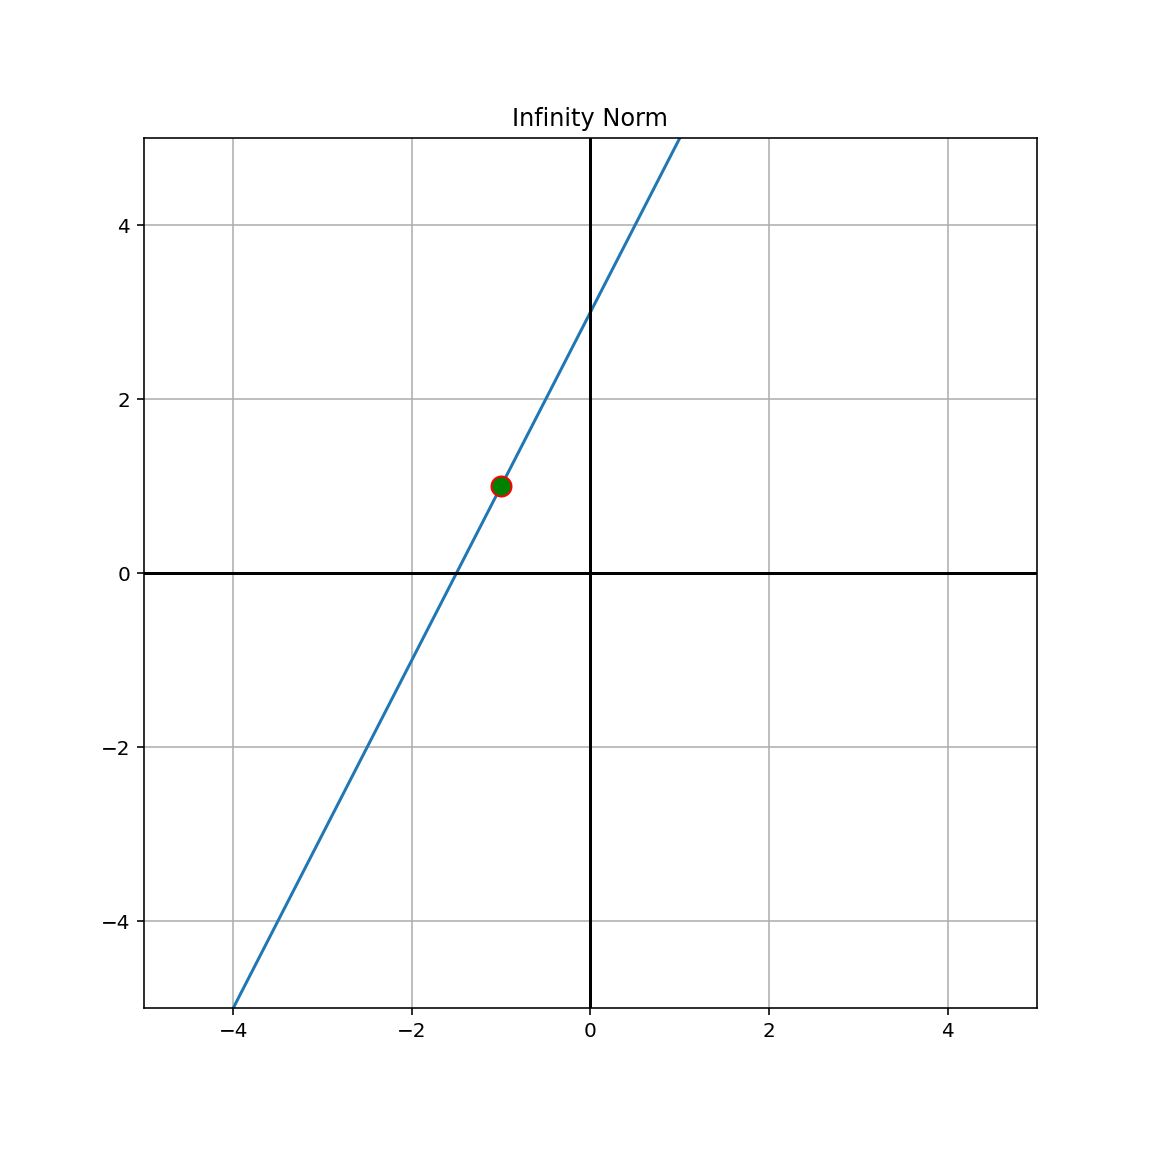

In [345]:
plt.figure(figsize=(8,8))
plt.title('Infinity Norm')
plt.plot(x1,x2)
plt.plot(infty_coords[0], infty_coords[1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show();

Now if we look at all of the points where $$\min({|x_{1}|, |x_{2}|}) \approx 1.$$, we can get an approximate intuition of the shape of the $\ell_{\infty}$ norm.


In [346]:
norm

1.000000000004988

In [347]:
x1_norm

array([], dtype=float64)

In [348]:
x1_norm = np.arange(-round(norm), round(norm), 0.0001)
x2_norm_pos = np.array([max(norm, abs(i)) for i in x1_norm])
x2_norm_neg = -x2_norm_pos

<IPython.core.display.Javascript object>


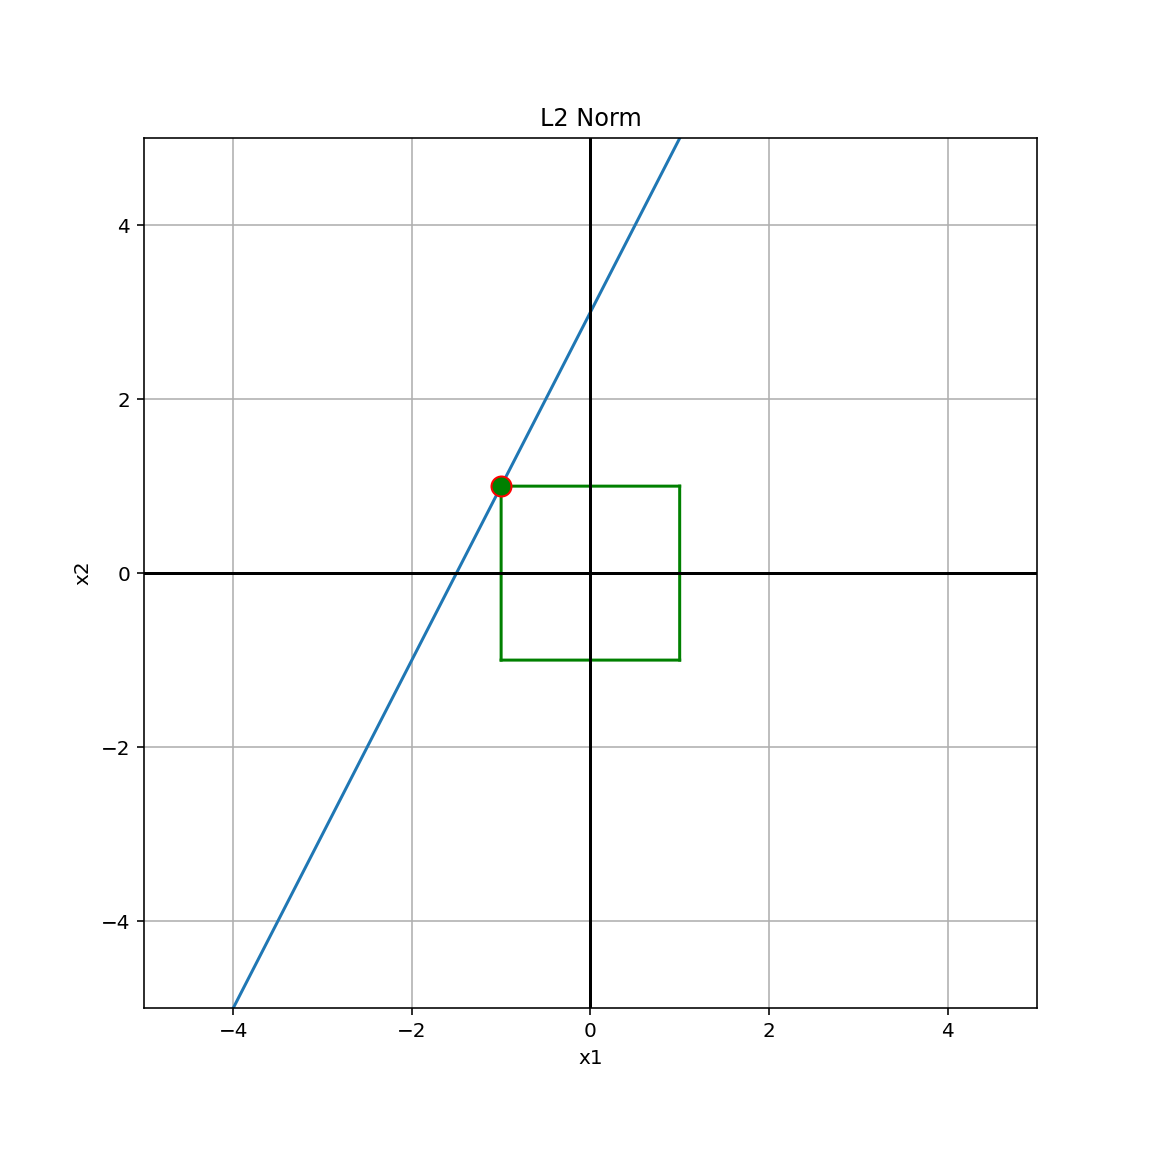

In [349]:
plt.figure(figsize=(8,8))
plt.title('L2 Norm')
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(x1,x2)
plt.plot(x1_norm, x2_norm_pos, color='green')
plt.plot(x2_norm_pos, x1_norm, color='green') # Need to include rotation for when |x|>|y|
plt.plot(x1_norm, x2_norm_neg, color='green')
plt.plot(x2_norm_neg, x1_norm, color='green') # Same note as above
plt.plot(infty_coords[0], infty_coords[1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show();

We can see that the $\ell_{\infty}$ norm is given by the square shape.

Another intuition behind this is that the $\ell_{\infty}$ is always looking for the largest component of the components in a vector, but since we want to minimize this quantity with respect to some function, it will be where $component_{i} = component_{j}$, which gives us this square/cube shape.

Try out some other configurations for functions in the scenario above.

---

### 3-D Norm Visualization

We can create the same type of visual in the 3-D space.

This time instead of using a line we will use a plane with the following equation:

$$ x_{3} = 2x_{1} + 3x_{2} + 4 $$

In [265]:
x1 = np.arange(-5, 5, .01)
x2 = np.arange(-5, 5, .01)
plane_func = lambda x1, x2: (2*x1) + (3*x2) + 4

<IPython.core.display.Javascript object>


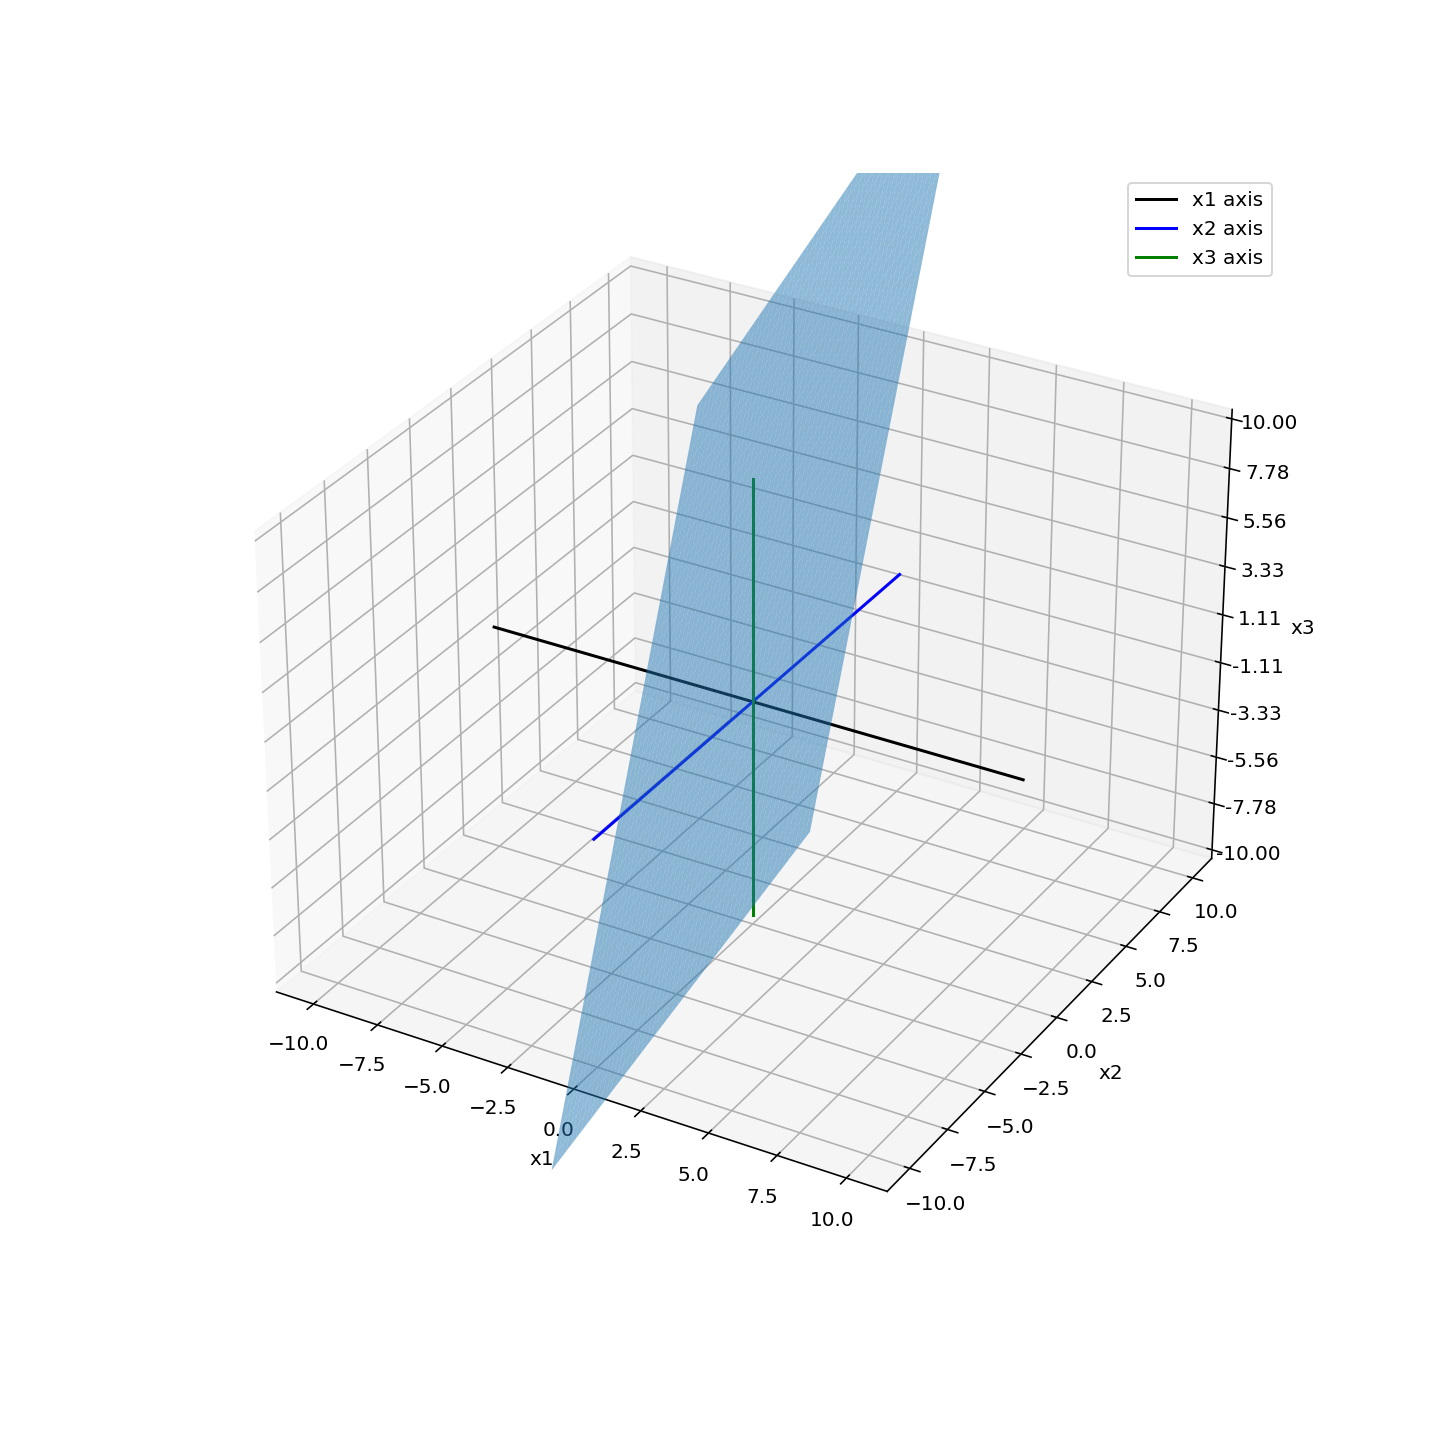

In [266]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})

X1, X2 = np.meshgrid(x1, x2)
X3 = plane_func(X1, X2)

surf = ax.plot_surface(X1, X2, X3, alpha=.5)

ax.plot([-10,10],[0,0], [0,0], color='black',label='x1 axis')
ax.plot([0,0],[-10,10], [0,0], color='blue', label='x2 axis')
ax.plot([0,0],[0,0],[-10,10],color='green',label='x3 axis')

ax.set_zlim(-10, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.legend()


plt.show()

---

Now if we combine all three of these arrays into `x,y,z` coordinate pairs, we can find where the norm is minimized.

---

In [411]:
coords = np.stack((X1, X2, X3)).T

# Calculate L2 Norm of each coordinate pair 
coord_max = np.max(np.abs(coords),axis=-1)

In [430]:
# Find where norm is minimized
opt_norm = np.min(coord_max)
opt_norm

0.6700000000000923

In [431]:
# Check the components of the minimized norm
min_coords = coords[np.where(abs(coord_max) <= opt_norm)].flatten()

In [432]:
def satisfies_fn(coordinates, A=[2, 3, -1], b=4):
    '''
    Sanity check to make sure the dot products of our coordinates with our original matrix A is approximately 0.
    
    This may be slightly different from 0 due to floating point operations, so I use a small epsilon value to
    substitute for 0.
    '''
    eps = 1e-10
    assert np.all(np.abs(np.dot(coords, A) + 4) <= eps), "\033[93mFunction not satisfied error\033[0m"
    print("\033[92mCoordinates satisfied!\033[0m")

In [433]:
satisfies_fn(coords)

Coordinates satisfied!


The nearest solution per our coordinates would be: (if more than 1 set this is due to rounding approximation).



In [434]:
min_coords

array([-0.67, -0.67,  0.65, -0.66, -0.67,  0.67])

<IPython.core.display.Javascript object>


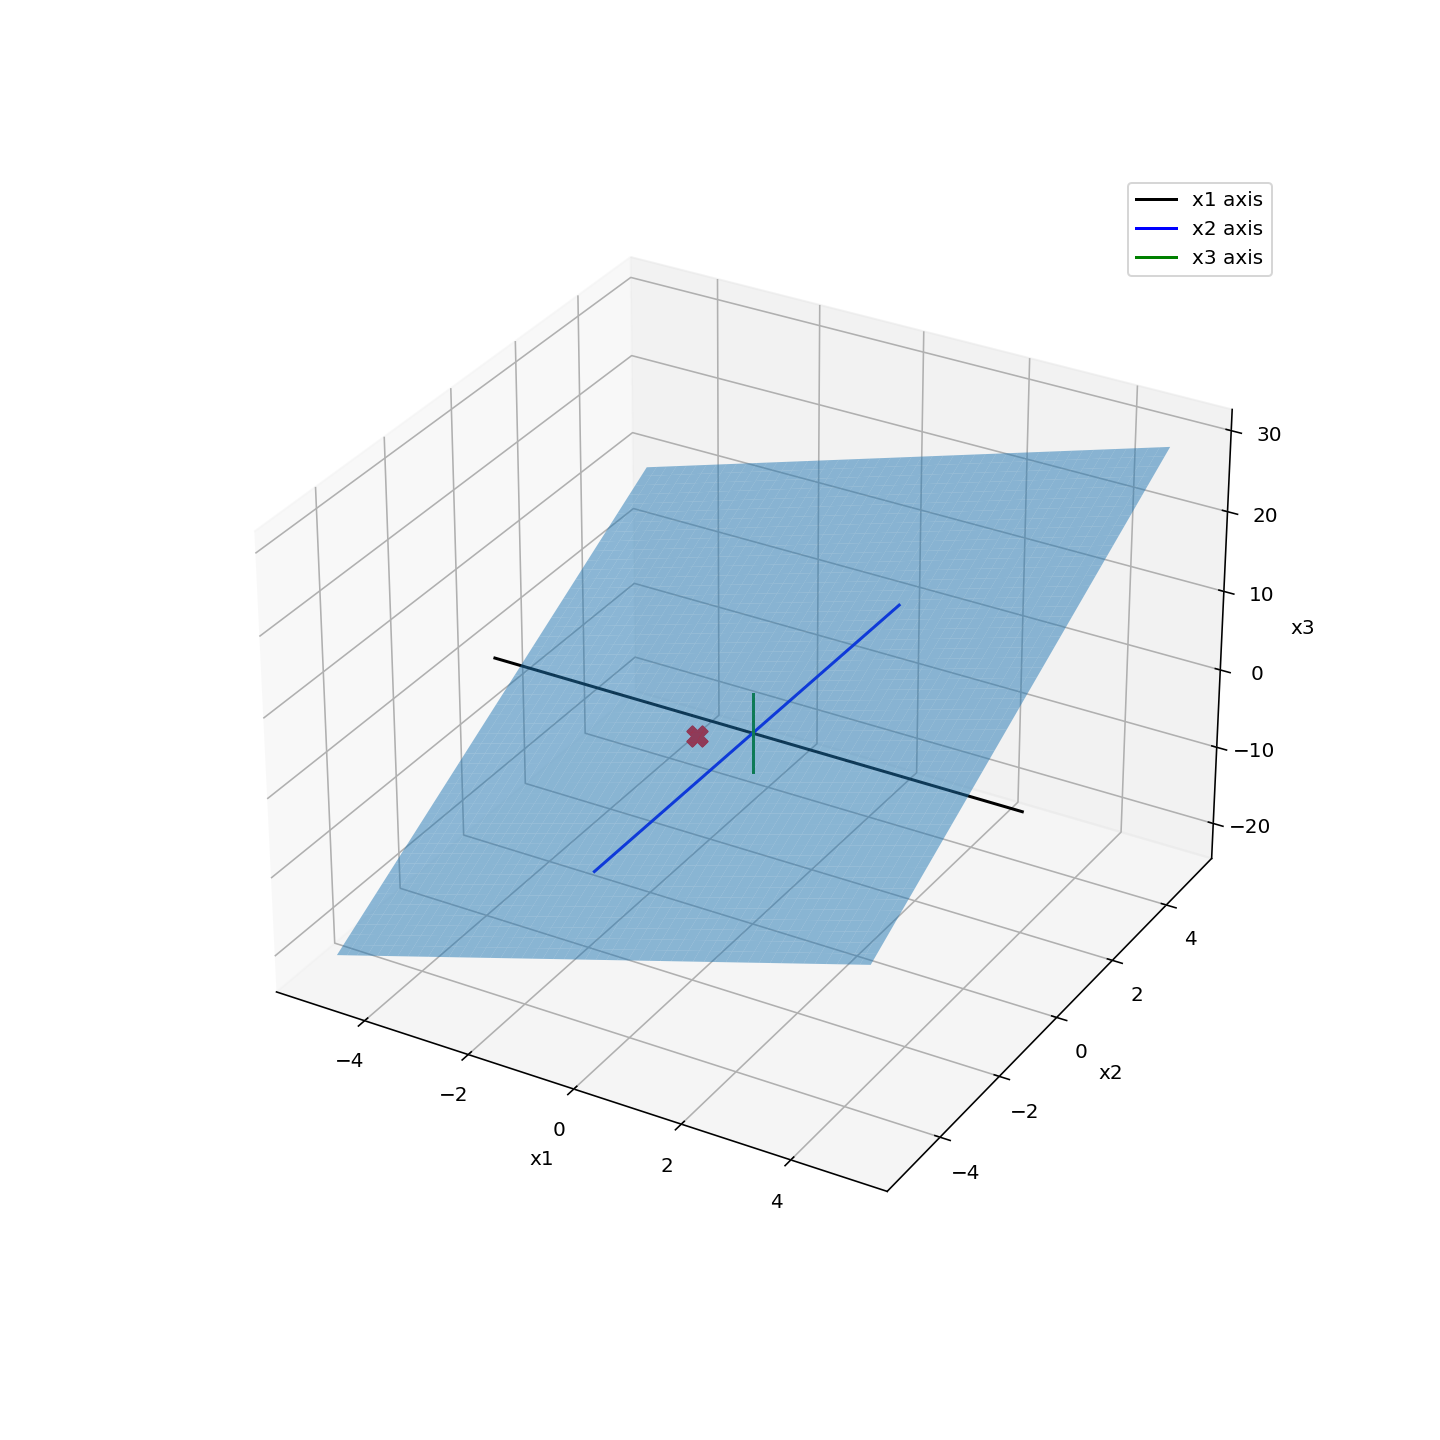

In [435]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})

X1, X2 = np.meshgrid(x1, x2)
X3 = plane_func(X1, X2)

surf = ax.plot_surface(X1, X2, X3, alpha=.5)

ax.plot([-5,5],[0,0], [0,0], color='black',label='x1 axis')
ax.plot([0,0],[-5,5], [0,0], color='blue', label='x2 axis')
ax.plot([0,0],[0,0],[-5,5],color='green',label='x3 axis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

min_coords0 = min_coords[:3]
min_coords1 = min_coords[3:]

xx0, yy0, zz0 = min_coords0
xx1, yy1, zz1 = min_coords1

ax.scatter(xx0, yy0, zz0, c='red', marker='X', s=100)
ax.scatter(xx1, yy1, zz1, c='red', marker='X', s=100)

plt.legend()


plt.show()

---

Now we can look at the entire surface which minimizes the $\ell_{\infty}$ norm.

In [436]:
x1 = np.arange(-5, 5, .01)
x2 = np.arange(-5, 5, .01)

X1, X2 = np.meshgrid(x1, x2)

In [450]:
pos_norm_func = lambda x1, x2: np.max((np.abs(x1), np.abs(x2)), axis=0)

In [455]:
# Positive Piece
x1n_pos = np.arange(-(opt_norm), (opt_norm+0.001), .001)
x2n_pos = np.arange(-(opt_norm), (opt_norm+0.001), .001)

x1n_pos, x2n_pos = np.meshgrid(x1n_pos, x2n_pos)

x3n_pos = pos_norm_func(x1n_pos, x2n_pos)

<IPython.core.display.Javascript object>


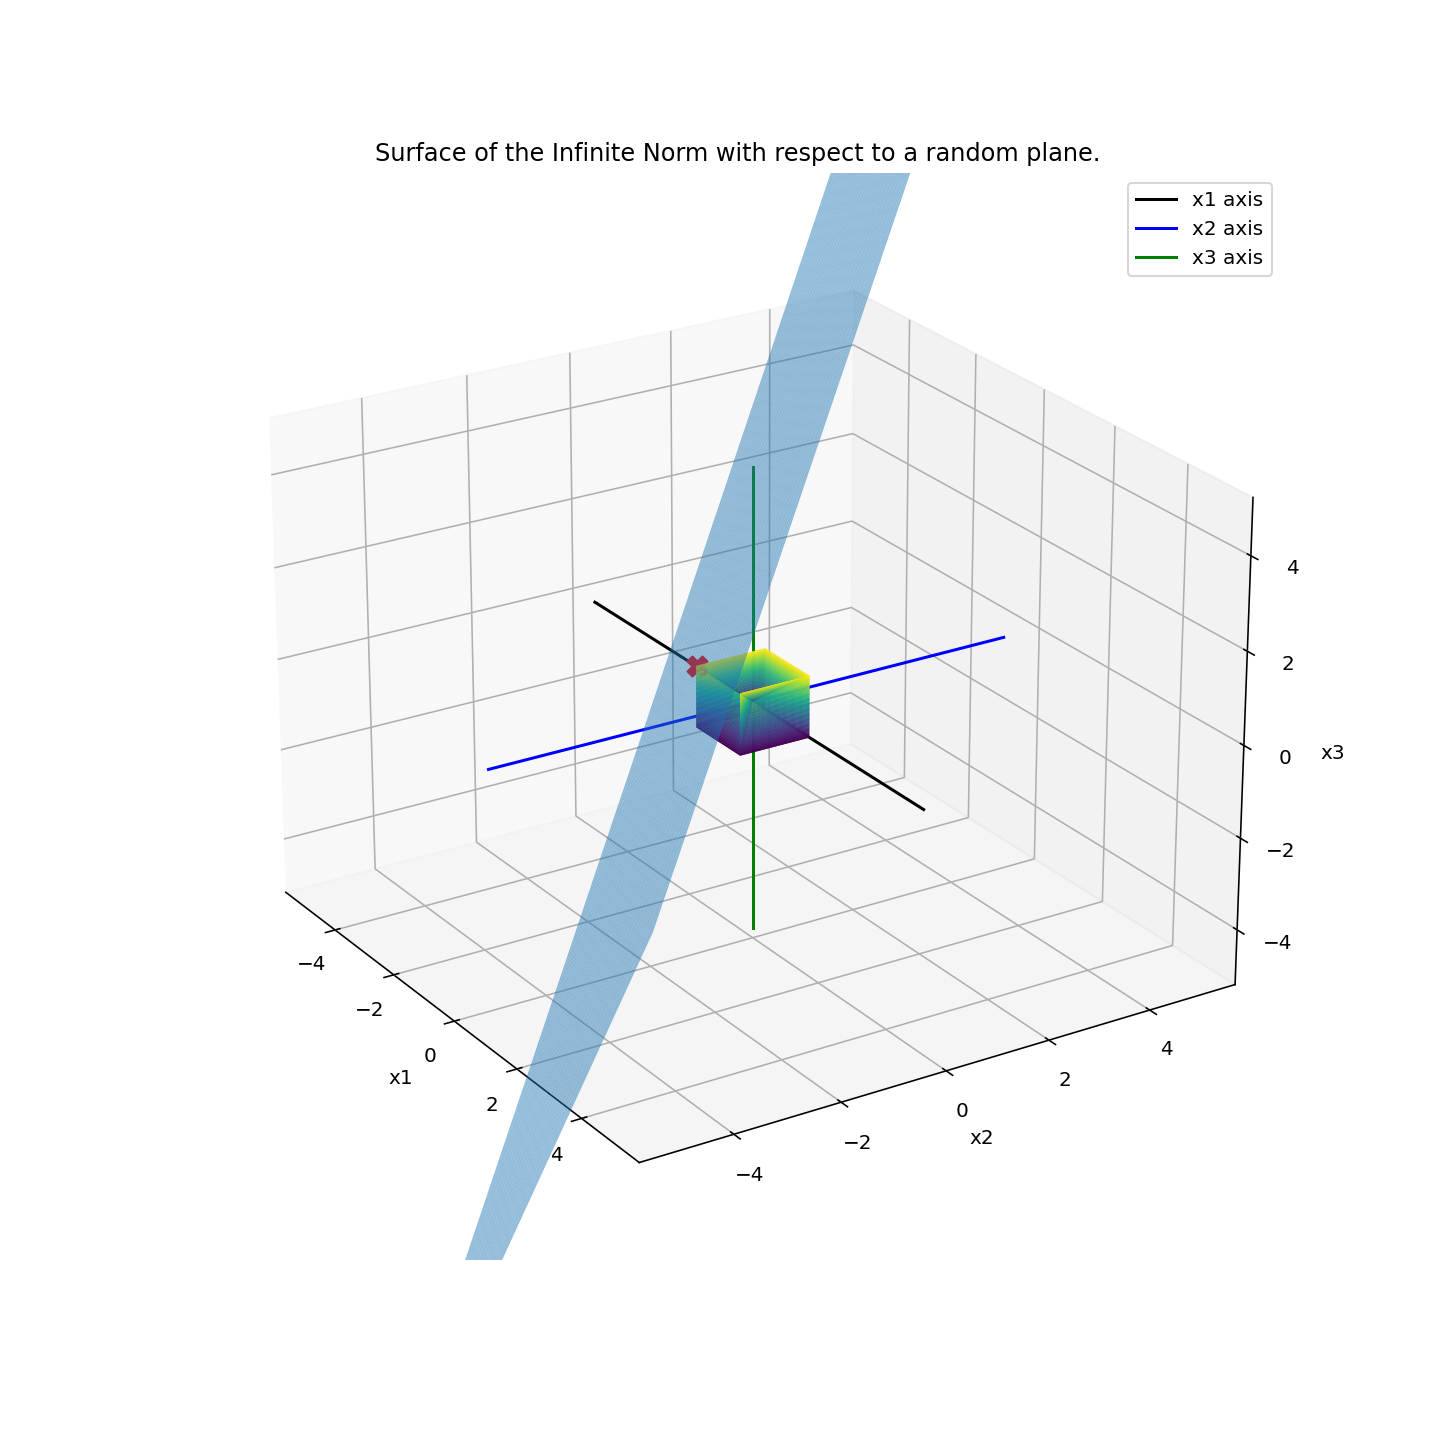

In [456]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={"projection": "3d"})

# Make data.
X1, X2 = np.meshgrid(x1, x2)
X3 = plane_func(X1, X2)

# Plot the surface.
surf = ax.plot_surface(X1, X2, X3, alpha=0.5)


# To differentiate the pieces of the cube, I will draw them in different colors
surf0 = ax.plot_surface(x1n_pos, x2n_pos, x3n_pos, alpha=1, cmap='viridis')
surf1 = ax.plot_surface(x1n_pos, x2n_pos, -x3n_pos, alpha=1, cmap='viridis')


surf2 = ax.plot_surface(x3n_pos, x2n_pos, x1n_pos, alpha=1, cmap='viridis')
surf3 = ax.plot_surface(-x3n_pos, x1n_pos, x2n_pos, alpha=1, cmap='viridis')

surf2 = ax.plot_surface(x2n_pos, x3n_pos, x1n_pos, alpha=1, cmap='viridis')
surf3 = ax.plot_surface(-x2n_pos, -x3n_pos, x1n_pos, alpha=1, cmap='viridis')


ax.plot([-5,5],[0,0], [0,0], color='black',label='x1 axis')
ax.plot([0,0],[-5,5], [0,0], color='blue', label='x2 axis')
ax.plot([0,0],[0,0],[-5,5],color='green',label='x3 axis')

# Customize the z axis.
ax.set_zlim(-5, 5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Surface of the Infinite Norm with respect to a random plane.')

xx, yy, zz = min_coords1


ax.scatter(xx, yy, zz, c='red', marker='X', s=100)

plt.legend()

plt.show()